# Import

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

import os
from glob import glob

import numpy as np
import pandas as pd
import cv2

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Data Modeling & Model Evaluation

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

import keras
import matplotlib.cm as cm

In [ ]:
%cd '/content/drive/MyDrive/Proyecto Desarrollo en Aplicaciones con Visión Artificial'

/content/drive/.shortcut-targets-by-id/14LYEI5Mo5p_F1fHhFIjh04RTmjbpVPL9/Proyecto Desarrollo en Aplicaciones con Visión Artificial


# Read Data

In [ ]:
covid_imgdir_path = os.path.join(os.getcwd(),
                                   'COVID-19_Radiography_Dataset',
                                   'COVID',
                                   'images')

normal_imgdir_path = os.path.join(os.getcwd(),
                                   'COVID-19_Radiography_Dataset',
                                   'Normal',
                                   'images')

print(os.path.isdir(covid_imgdir_path))
print(os.path.isdir(normal_imgdir_path))

True
True


# Lista de Nombres

In [ ]:
covid_imglist_names = [images_name for images_name in os.listdir(covid_imgdir_path)]
normal_imglist_names = [images_name for images_name in os.listdir(normal_imgdir_path)]

print(f'{len(covid_imglist_names)}')
print(f'{len(normal_imglist_names)}')

3616
10192


# Crear DataFrame de URLs

In [ ]:
def create_df_url(img_listname, category, imgdir_path):
  df = pd.DataFrame({'imgname':img_listname,
                     'category':category})
  df['url'] = imgdir_path + '/' + df['imgname']
  return df

In [ ]:
df_covid = create_df_url(img_listname = covid_imglist_names, 
                         category = 'Covid', 
                         imgdir_path = covid_imgdir_path)

df_normal = create_df_url(img_listname = normal_imglist_names, 
                         category = 'Normal', 
                         imgdir_path = normal_imgdir_path)

df_covid.head()

,imgname,category,url
0,COVID-3100.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...
1,COVID-3390.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...
2,COVID-3259.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...
3,COVID-3135.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...
4,COVID-3111.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...


# Verificar URL

In [ ]:
os.path.isfile(df_covid['url'].iloc[0]) # Verificar primer url

True

# Unir DF

In [ ]:
df = pd.concat([df_covid, df_normal])
df.shape

(13808, 3)

# Duplicados

In [ ]:
df.duplicated().sum()

0

# Nulos

In [ ]:
df.isnull().sum()

imgname     0
category    0
url         0
dtype: int64

# Contar categorias

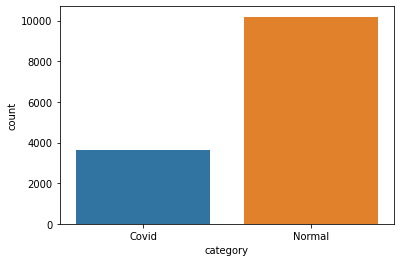

In [ ]:
sns.countplot(data = df,
              x = 'category')

# Agregar Columna de array de imagenes

In [ ]:
def read_resize_image(input):
  image = cv2.resize(src = cv2.cvtColor(cv2.imread(input),
                                        cv2.COLOR_BGR2RGB),
                     dsize = (75, 75),
                     interpolation = cv2.INTER_AREA
                     )
  return image

In [ ]:
df['image'] = df['url'].apply(lambda x:read_resize_image(x))

df.head()

,imgname,category,url,image
0,COVID-3100.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[2, 2, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,COVID-3390.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."
2,COVID-3259.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."
3,COVID-3135.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[19, 19, 19], [19, 19, 19], [19, 19, 19], [1..."
4,COVID-3111.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[17, 17, 17], [0, 0, 0], [0, 0, 0], [0, 0, 0..."


# Normalizar

In [ ]:
df['image'] = df['image'] / 255
df.head()

,imgname,category,url,image
0,COVID-3100.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.00784313725490196, 0.00784313725490196, 0..."
1,COVID-3390.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.01568627450980392, 0.01568627450980392, 0..."
2,COVID-3259.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.01568627450980392, 0.01568627450980392, 0..."
3,COVID-3135.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.07450980392156863, 0.07450980392156863, 0..."
4,COVID-3111.png,Covid,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.06666666666666667, 0.06666666666666667, 0..."


# Reemplazar

In [ ]:
df['category'].replace({'Covid':1,
                        'Normal':0}, inplace = True)
df.head()

,imgname,category,url,image
0,COVID-3100.png,1,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.00784313725490196, 0.00784313725490196, 0..."
1,COVID-3390.png,1,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.01568627450980392, 0.01568627450980392, 0..."
2,COVID-3259.png,1,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.01568627450980392, 0.01568627450980392, 0..."
3,COVID-3135.png,1,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.07450980392156863, 0.07450980392156863, 0..."
4,COVID-3111.png,1,/content/drive/.shortcut-targets-by-id/14LYEI5...,"[[[0.06666666666666667, 0.06666666666666667, 0..."


In [ ]:
df['category'].value_counts()

0    10192
1     3616
Name: category, dtype: int64

# Separar X e Y

In [ ]:
df['image'].iloc[0].shape

(75, 75, 3)

In [ ]:
np.array(df['image'].tolist()).shape

(13808, 75, 75, 3)

In [ ]:
X = np.array(df['image'].tolist())
y = np.array(df['category'])

# Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 15)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(9941, 75, 75, 3) (2762, 75, 75, 3) (1105, 75, 75, 3) (9941,) (2762,) (1105,)


# Guardar Arreglos

In [ ]:
path = '/content/drive/MyDrive/Proyecto Desarrollo en Aplicaciones con Visión Artificial/Sergio Borrador'
np.save(path + '/x_train.npy', x_train)
np.save(path + '/x_test.npy', x_test)
np.save(path + '/x_val.npy', x_val)

np.save(path + '/y_train.npy', y_train)
np.save(path + '/y_test.npy', y_test)
np.save(path + '/y_val.npy', y_val)